In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [3]:
sn = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3/output', 50, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

In [5]:
dir(sn.part4)

['Acceleration',
 'BirthDensity',
 'BirthPos',
 'BirthVel',
 'ColumnDensity',
 'Coordinates',
 'CumFeedbackMomentum',
 'CumInjFeedbackMomentum',
 'CumInjFeedbackMomentumAGB',
 'CumSNIINumber',
 'CumSNIaNumber',
 'Cum_RadMomentumRealInjected',
 'Cum_RadiationMomentumReleased',
 'FeedbackEnergy',
 'FeedbackMomentum',
 'FeedbackMomentumAGB',
 'GFM_InitialMass',
 'GFM_Metallicity',
 'GFM_Metals',
 'GFM_StellarFormationTime',
 'LocISMDens',
 'MassReleased',
 'Masses',
 'NormSphRadFeedback',
 'ParticleIDs',
 'Potential',
 'RadCoolShutoffTime',
 'RadFeedTau',
 'RadFeed_NumNgb',
 'RadiationMomentumReleased',
 'SNIINumber',
 'SNIaNumber',
 'Softenings',
 'StarsHsml',
 'StarsMaxRadius',
 'StromgrenRadius',
 'Velocities',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__'

In [66]:
snoutl4 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl4-radoutput/output', 10, combineFiles=True)
snoutl3 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3-radoutput/output', 10, combineFiles=True)
snoutl2 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl2-radoutput/output', 10, combineFiles=True)


In [67]:
print(snoutl4.part4.RadFeedTau[snoutl4.part4.RadFeedTau > 0])
print(snoutl3.part4.RadFeedTau[snoutl3.part4.RadFeedTau > 0])
print(snoutl2.part4.RadFeedTau[snoutl2.part4.RadFeedTau > 0])

[1.6831237  0.64001334 6.0067935  1.489678   0.9922383  1.1279852
 3.796039   2.4410088  0.5597569 ]
[0.25563988 1.0313649  0.29954228 0.6580477  0.8050854  0.85718775
 1.0097865  1.0180628  0.36856404 0.5162946  0.7811236  1.8388983
 0.38909072 0.13142394 1.2344168  0.29848468 1.4930079  0.51620466
 1.0302144  0.81509155 0.6124059  0.6503344  0.6025259  0.89182043
 0.8445326  2.283946   0.19569781 0.4997435  0.3077721  0.04146619
 0.48633012 0.6472441  0.78524446 0.55836564 3.5803468  0.33216006
 0.8682569 ]
[ 2.1244748   3.6684544   0.8481174   0.31201115 15.858271    2.7644215
  0.457762    1.1677576   0.4637719   0.9675403   0.14112508  0.3653622
  0.43224034  1.66355     0.4917576   0.109056    0.5892823   1.1560199
  0.33372584  1.5562911   1.4162923   0.0530144   0.07219151  0.7749811
  0.3240269   4.7743163   0.18226655  0.45096946  2.086406    1.3701972
  0.18575135  3.4353354   0.6201862   0.89458096  0.7389905   0.17704119
  0.17920384  0.88072574  1.8300143   0.5774949   0.

In [68]:
act_moml4 = np.linalg.norm(snoutl4.part0.RadFeedLinearMomentum, axis=1)
cum_moml4 = snoutl4.part0.RadFeedCumMomentum

act_moml3 = np.linalg.norm(snoutl3.part0.RadFeedLinearMomentum, axis=1)
cum_moml3 = snoutl3.part0.RadFeedCumMomentum

act_moml2 = np.linalg.norm(snoutl2.part0.RadFeedLinearMomentum, axis=1)
cum_moml2 = snoutl2.part0.RadFeedCumMomentum

(0.0, 2.0)

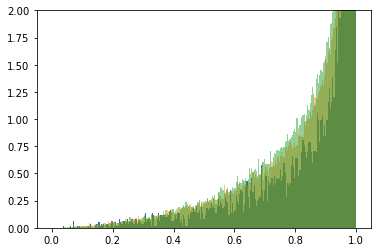

In [69]:
key = cum_moml4 > 0
plt.hist(act_moml4[key]/cum_moml4[key], bins=np.linspace(0, 1, 256), density=True);

key = cum_moml3 > 0
plt.hist(act_moml3[key]/cum_moml3[key], bins=np.linspace(0, 1, 256), alpha=0.5, density=True);

key = cum_moml2 > 0
plt.hist(act_moml2[key]/cum_moml2[key], bins=np.linspace(0, 1, 256), alpha=0.5, density=True);

# plt.yscale('log')
plt.ylim(0, 2)

In [72]:
key = cum_moml4 > 0
ratiol4 = act_moml4[key]/cum_moml4[key]
less5l4 = len(np.where(ratiol4 < 0.5)[0])
print('lvl4 fraction < 0.5 : ', less5l4/len(ratiol4))

key = cum_moml3 > 0
ratiol3 = act_moml3[key]/cum_moml3[key]
less5l3 = len(np.where(ratiol3 < 0.5)[0])
print('lvl3 fraction < 0.5 : ', less5l3/len(ratiol3))

key = cum_moml2 > 0
ratiol2 = act_moml2[key]/cum_moml2[key]
less5l2 = len(np.where(ratiol2 < 0.5)[0])
print('lvl2 fraction < 0.5 : ', less5l2/len(ratiol2))

lvl4 fraction < 0.5 :  0.02513607730414042
lvl3 fraction < 0.5 :  0.0385811182125462
lvl2 fraction < 0.5 :  0.03840449677572659


In [73]:
print(np.sum(act_moml4)/np.sum(cum_moml4))
print(np.sum(act_moml3)/np.sum(cum_moml3))
print(np.sum(act_moml2)/np.sum(cum_moml2))

0.8909726
0.8510264
0.8477757
